<a href="https://colab.research.google.com/github/Saketh2611/Diabetes-Predictor/blob/main/Diabetis_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Dataset of Diabetes .csv to Dataset of Diabetes .csv


IMPORT NECESSARY LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOAD DATASET

In [3]:
data = pd.read_csv('Dataset of Diabetes .csv')

PREVIEVING DATASET

In [4]:
print(data.head())
data = data[data['CLASS'] != 'P']
print("DATASET SHAPE(rows,columns) : " , data.shape)

    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  
DATASET SHAPE(rows,columns) :  (947, 14)


Doing necessary classification

In [5]:
obj = (data.dtypes == 'object')
object_column = list(obj[obj].index)
print(object_column)

int_ = (data.dtypes== 'int')
num_column = list(int_[int_].index)

fl = (data.dtypes == 'float')
fl_column = list(fl[fl].index)

['Gender', 'CLASS']


CORRELATION HEATMAP

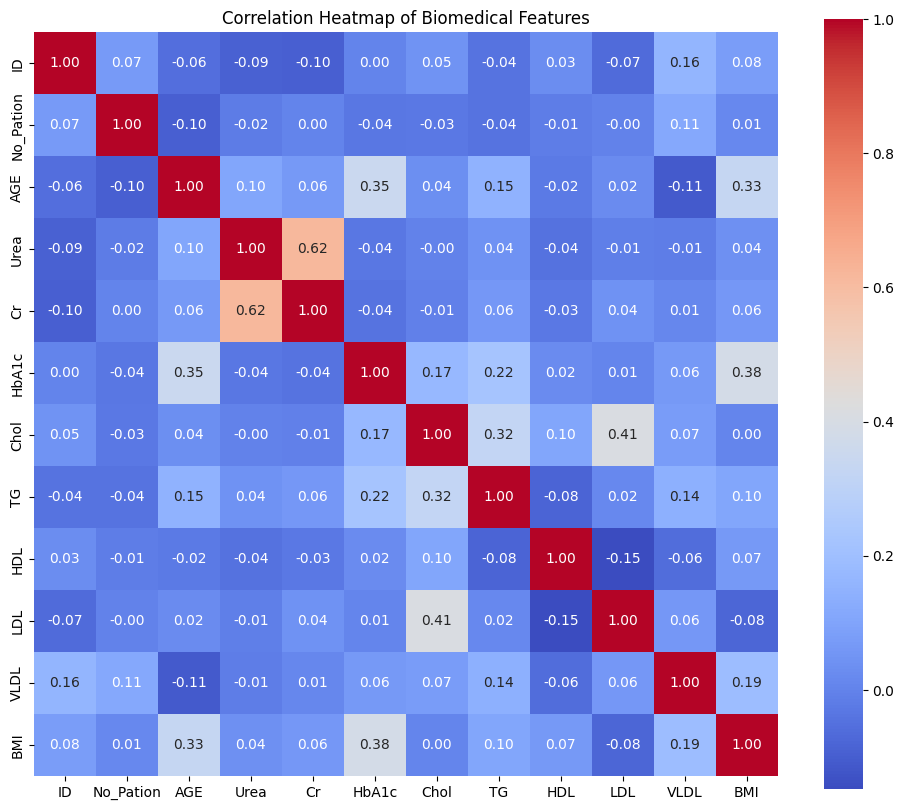

In [6]:
# Drop non-numeric/identifier columns
df_numeric = data.drop(object_column , axis = 1)

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Biomedical Features')
plt.show()

LABEL ENCODING GENDER

In [7]:
data['Gender'] = data['Gender'].map({'F': 0, 'M': 1})

PROPERLY SEPERATING INPUTS AND OUTPUTS AS (x and y)

In [8]:
data['CLASS'] = data['CLASS'].str.strip()
x = data.drop(['CLASS'] , axis = 1)
y = data['CLASS']
xData = x.values
yData = y.values

SPLITTING OF TRAINING DATA AND TEST DATA

In [9]:
#TRAIN_TEST SPLIT
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(xData , yData , test_size = 0.2 , random_state = 42)

PROPER TRAINING OF THE MODEL (class_weight='balanced' makes the model pay more attention to the minority class during training by adjusting the weight (importance) of each class internally.)

In [34]:
#ML MODELS
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Handle class imbalance

model = RandomForestClassifier(class_weight='balanced')
model.fit(xTrain, yTrain)

yPred = model.predict(xTest)

CLASSIFICATION REPORT

In [35]:
print("Accuracy:", accuracy_score(yTest, yPred))
print("Classification Report:\n", classification_report(yTest, yPred, zero_division=0))

Accuracy: 0.968421052631579
Classification Report:
               precision    recall  f1-score   support

           N       0.89      0.80      0.84        20
           Y       0.98      0.99      0.98       170

    accuracy                           0.97       190
   macro avg       0.93      0.89      0.91       190
weighted avg       0.97      0.97      0.97       190



CONFUSION MATRIX

In [45]:
acc = accuracy_score(yTest, yPred)
prec = f1_score(yTest, yPred, pos_label='Y')
class_report = classification_report(yTest, yPred, output_dict=True)
metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Y)', 'Recall (Y)', 'F1-score (Y)'],
    'Score': [
        round(acc, 4),
        round(class_report['Y']['precision'], 4),
        round(class_report['Y']['recall'], 4),
        round(class_report['Y']['f1-score'], 4)
    ]
})

print("\n📋 Performance Metrics Summary:")
print(metrics_table.to_string(index=False))


📋 Performance Metrics Summary:
       Metric  Score
     Accuracy 0.9684
Precision (Y) 0.9767
   Recall (Y) 0.9882
 F1-score (Y) 0.9825


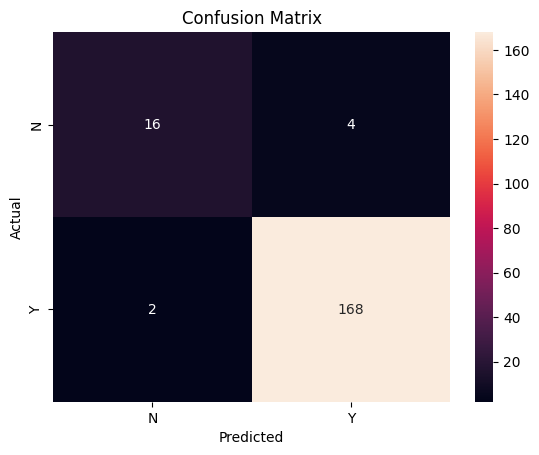

In [36]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(yTest , yPred)

sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('clf', RandomForestClassifier())
])

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
param_grid = {
    'clf__random_state': [42],
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 30],
    'clf__class_weight': ['balanced']
}

# Use f1 scorer that handles string labels
f1_y_scorer = make_scorer(f1_score, pos_label='Y')

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring=f1_y_scorer, n_jobs=-1, verbose=1)
print("\n🔍 Running GridSearchCV on AE latent features...")
grid_search.fit(xTrain, yTrain)
print("\n✅ GridSearchCV completed.")


🔍 Running GridSearchCV on AE latent features...
Fitting 3 folds for each of 9 candidates, totalling 27 fits

✅ GridSearchCV completed.


In [39]:
best_model = grid_search.best_estimator_
y_best_pred = best_model.predict(xTest)

In [47]:
acc = accuracy_score(yTest, y_best_pred)
prec = f1_score(yTest, y_best_pred, pos_label='Y')
class_report = classification_report(yTest, y_best_pred, output_dict=True)
metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Y)', 'Recall (Y)', 'F1-score (Y)'],
    'Score': [
        round(acc, 4),
        round(class_report['Y']['precision'], 4),
        round(class_report['Y']['recall'], 4),
        round(class_report['Y']['f1-score'], 4)
    ]
})

metrics_table

,Metric,Score
0,Accuracy,0.9789
1,Precision (Y),0.9882
2,Recall (Y),0.9882
3,F1-score (Y),0.9882


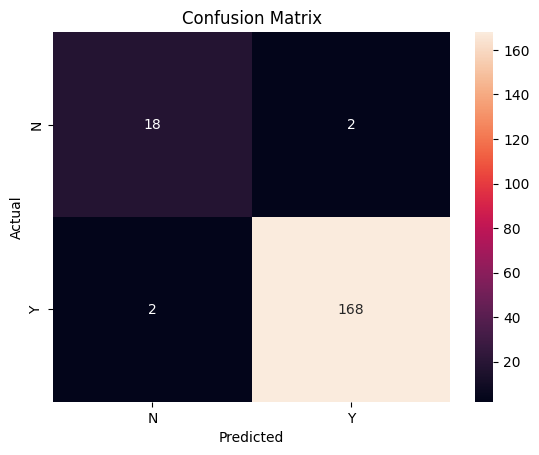

In [41]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(yTest , y_best_pred)

sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

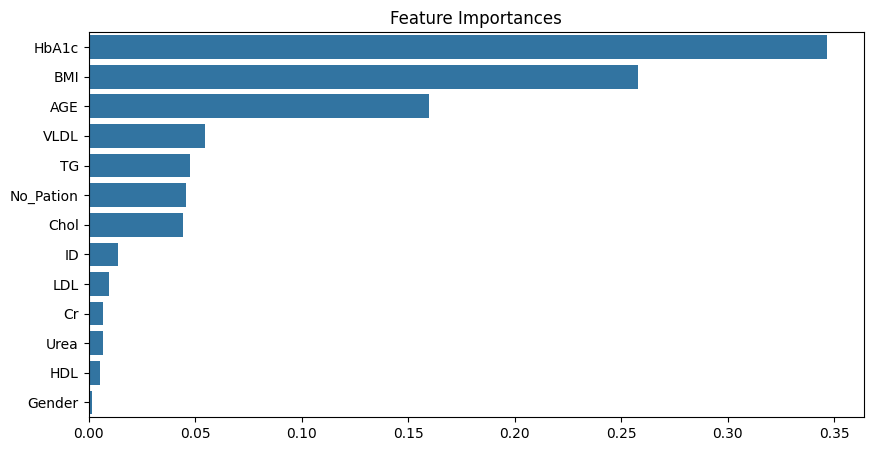

In [43]:
importances_1 = model.feature_importances_
feature_names_1 = x.columns  # Original feature names
sorted_idx = np.argsort(importances_1)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=importances_1[sorted_idx], y=np.array(feature_names_1)[sorted_idx])
plt.title("Feature Importances")
plt.show()

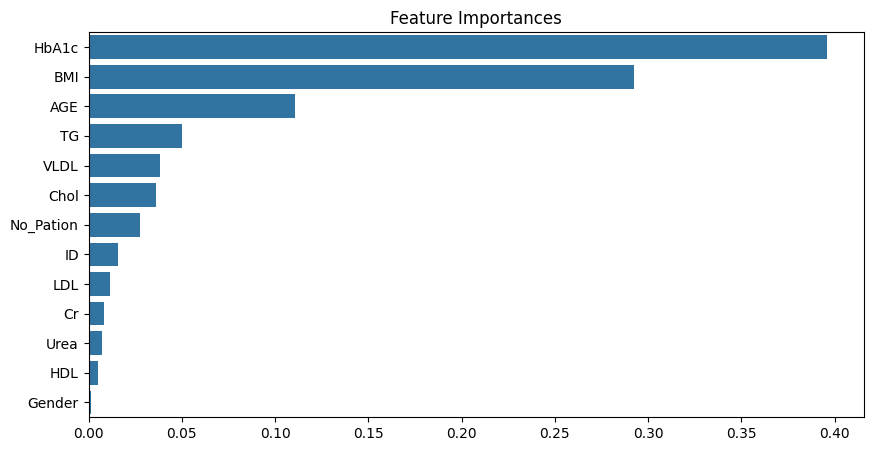

In [42]:
importances = best_model.named_steps['clf'].feature_importances_
feature_names = x.columns  # Original feature names
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=importances[sorted_idx], y=np.array(feature_names)[sorted_idx])
plt.title("Feature Importances")
plt.show()
